In [5]:
%load_ext autoreload
%autoreload 2
# Enable imports form top-level of project (edit top_level_path accordingly)
import os
import sys
top_level_path = os.path.abspath(os.path.join('..'))
if top_level_path not in sys.path:
	sys.path.append(top_level_path)

In [11]:
benchmark_path = "../benchmarks/average_length_n30"

In [12]:
from benchmarking import Benchmark, new_random_benchmark, RandomParams
from longestpath.solvers import Solver
import numpy as np

params_code = "[RandomParams(directed=True, num_vertices=30, average_degree=a) for a in np.arange(0.1, 4.1, 0.1) for _ in range(50)]"
params_list = eval(params_code)
solvers = [Solver("brute", "BRANCH_N_BOUND")]

new_random_benchmark(params_list=params_list, params_code=params_code, solvers=solvers, override_benchmark_path=benchmark_path)

In [14]:
Benchmark.load(benchmark_path).run()

graph: 1990.txt, solver: brute('BRANCH_N_BOUND') ... ✅
length: 29, run_time: 0.031868
graph: 1991.txt, solver: brute('BRANCH_N_BOUND') ... ✅
length: 29, run_time: 0.012425
graph: 1992.txt, solver: brute('BRANCH_N_BOUND') ... ✅
length: 29, run_time: 0.032812
graph: 1993.txt, solver: brute('BRANCH_N_BOUND') ... ✅
length: 29, run_time: 1.811628
graph: 1994.txt, solver: brute('BRANCH_N_BOUND') ... ✅
length: 29, run_time: 0.028297
graph: 1995.txt, solver: brute('BRANCH_N_BOUND') ... ✅
length: 28, run_time: 0.000239
graph: 1996.txt, solver: brute('BRANCH_N_BOUND') ... ✅
length: 29, run_time: 0.000317
graph: 1997.txt, solver: brute('BRANCH_N_BOUND') ... ✅
length: 29, run_time: 3.9e-05
graph: 1998.txt, solver: brute('BRANCH_N_BOUND') ... ✅
length: 29, run_time: 0.013078
graph: 1999.txt, solver: brute('BRANCH_N_BOUND') ... ✅
length: 29, run_time: 5e-05


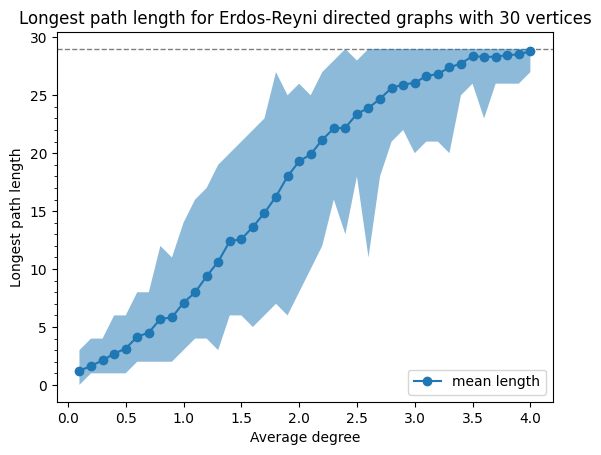

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from benchmarking import Benchmark

benchmark = Benchmark.load(benchmark_path)

results = benchmark.results()
solver_names = [str(solver) for solver in benchmark.solvers]
graph_infos = benchmark.info["graph_infos"]

df = pd.DataFrame(results)
df["solver_name"] = df["solver"].apply(lambda i: solver_names[i])
df["average_degree"] = df["graph_id"].apply(lambda id: graph_infos[id]['average_degree'])

view = df[['average_degree', 'solver_name','length', 'run_time']]

data = df.groupby(['average_degree']).agg({'length': ['min', 'max', 'mean']})['length'].reset_index()
data.plot(x='average_degree', y='mean', style="o-", label="mean length")

plt.fill_between(x='average_degree',y1='min',y2='max', data=data, alpha=0.5)
plt.yticks(range(0,26), minor=True)
# for solver_name in solver_names:
#     plt.scatter(df['average_degree'], df['length'], alpha=0.3, s=5)

plt.ylabel("Longest path length")
plt.xlabel("Average degree")
plt.title("Longest path length for Erdos-Reyni directed graphs with 30 vertices")
plt.axhline(y=29, color='black', linestyle='--', label='run-time cutoff', linewidth=1, alpha=0.5, zorder=0)


plt.savefig(os.path.join(benchmark.benchmark_path, "length_vs_degree.png"), dpi=400, bbox_inches='tight')

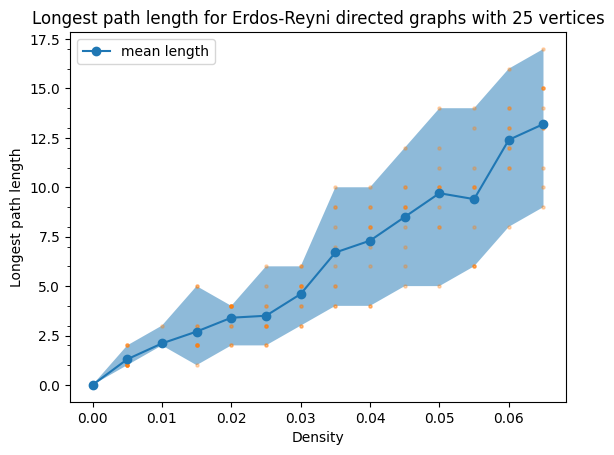

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

benchmark = Benchmark.load(benchmark_path)

results = benchmark.results()
solver_names = [str(solver) for solver in benchmark.solvers]
graph_infos = benchmark.info["graph_infos"]

df = pd.DataFrame(results)
df["density"] = df["graph_id"].apply(lambda id: graph_infos[id]['density'])

data = df.groupby(['density']).agg({'length': ['min', 'max', 'mean']})['length'].reset_index()
data.plot(x='density', y='mean', style="o-", label="mean length")

plt.fill_between(x='density',y1='min',y2='max', data=data, alpha=0.5)
plt.yticks(range(0,51), minor=True)
for solver_name in solver_names:
    plt.scatter(df['density'], df['length'], alpha=0.3, s=5)

plt.ylabel("Longest path length")
plt.xlabel("Density")
plt.title("Longest path length for Erdos-Reyni directed graphs with 25 vertices")

plt.savefig(os.path.join(benchmark.benchmark_path, "plot.png"), dpi=400, bbox_inches='tight')